In [0]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer
from sklearn.svm import SVC, LinearSVC

In [0]:
#reading loan data
df = pd.read_csv('loan.csv', low_memory=False)

In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'months', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
  

In [4]:
#Lets start with the target variable first
df['loan_status'].value_counts()

Fully Paid                                             36006
Current                                                 7663
Charged Off                                             6508
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                       243
In Grace Period                                          108
Late (16-30 days)                                         37
Default                                                   27
Name: loan_status, dtype: int64

In [5]:
df=df.loc[(df['loan_status']!= 'Current') & (df['loan_status']!= 'Issued') & (df['loan_status']!= 'Late (31-120 days)') & (df['loan_status']!= 'Late (16-30 days)') & (df['loan_status']!= 'In Grace Period')]
df.head(30)
print(df.shape)

(45290, 74)


In [6]:
#checking dataset records
print("\n*******Check Distinct Values in dataframe************")
print('Frequency:',df.member_id.unique())
print("\n*******Check for Null Values************")
print(df.isna().sum())
print("\n*******Check for duplicate patient id in dataset************")
print('Total count:',df.member_id.shape[0])
print('Distinct Count:',df.member_id.unique().shape[0])
print("\n*******No of records************")
print(df.shape[0])
print("\n*******No of columns************")
print(df.shape[1])
print("\n*******Columns in dataset************")
print(df.columns)


*******Check Distinct Values in dataframe************
Frequency: [ 1296599  1314167  1313524 ... 11031444 10868491 10430471]

*******Check for Null Values************
id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
                    ...  
all_util            45290
total_rev_hi_lim    40483
inq_fi              45290
total_cu_tl         45290
inq_last_12m        45290
Length: 74, dtype: int64

*******Check for duplicate patient id in dataset************
Total count: 45290
Distinct Count: 45290

*******No of records************
45290

*******No of columns************
74

*******Columns in dataset************
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'months', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
 

# Data Cleaning

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
miss_df=missing_value_df.sort_values('percent_missing', ascending=False)
miss_df.head(50)

,column_name,percent_missing
inq_last_12m,inq_last_12m,100.000000
il_util,il_util,100.000000
open_il_24m,open_il_24m,100.000000
mths_since_rcnt_il,mths_since_rcnt_il,100.000000
dti_joint,dti_joint,100.000000
total_bal_il,total_bal_il,100.000000
annual_inc_joint,annual_inc_joint,100.000000
verification_status_joint,verification_status_joint,100.000000
open_rv_12m,open_rv_12m,100.000000
open_il_6m,open_il_6m,100.000000


In [8]:
#some columns have more than 90% of the missing value, quickly understand by adding dictionary what those columns are about

data_dictionary = pd.read_excel('LCDataDictionary.xlsx') # Loading in the data dictionary
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})
loans_dtypes = pd.DataFrame(df.dtypes,columns=['dtypes'])
loans_dtypes = loans_dtypes.reset_index()
loans_dtypes['name'] = loans_dtypes['index']
loans_dtypes = loans_dtypes[['name','dtypes']]
loans_dtypes['first value'] = df.loc[0].values
preview = loans_dtypes.merge(data_dictionary, on='name',how='left')
preview['description']=preview['description'].str.wrap(100)
preview.style.set_properties(subset=['description'], **{'width': '300px'})

,name,dtypes,first value,description
0,id,int64,1077501,A unique LC assigned ID for the loan listing.
1,member_id,int64,1296599,A unique LC assigned Id for the borrower member.
2,loan_amnt,int64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,int64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975.000000,The total amount committed by investors for that loan at that point in time.
5,months,int64,36,nan
6,int_rate,float64,10.650000,Interest Rate on the loan
7,installment,float64,162.870000,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


In [0]:
#Seems those columns were mostly related to onging loan and also some columns have free text which we will not analyze as it will 
#require NLP techniques to infer from them, better to remove them

df=df.drop(["out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", 
            "total_rec_late_fee", "recoveries", "collection_recovery_fee","last_pymnt_amnt", 'last_pymnt_d', 
            'next_pymnt_d', "collections_12_mths_ex_med", 'last_credit_pull_d', "acc_now_delinq", "tot_coll_amt",  
            "tot_cur_bal", "total_rev_hi_lim", 'id', 'url', 'policy_code',
            'initial_list_status', 'pymnt_plan', 'member_id'], axis=1)

In [10]:
df.shape

(45290, 50)

In [11]:
#lets start exploring numerical variable first
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,months,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
count,45290.000000,45290.000000,45290.000000,45290.000000,45290.000000,45290.000000,4.528600e+04,45290.000000,45261.000000,45261.000000,17270.000000,4247.000000,45261.000000,45261.000000,4.529000e+04,45198.000000,45261.000000,1205.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,11222.333297,10992.247185,10359.905232,41.339457,12.294000,334.132369,6.967277e+04,13.700439,0.169926,1.076136,34.775217,61.161997,9.528026,0.071474,1.439514e+04,49.804735,22.525287,42.424066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7441.823306,7236.734861,7250.733916,9.981952,3.833879,218.176708,6.296517e+04,6.905592,0.560760,1.504814,22.312391,45.354085,4.565833,0.292255,2.202903e+04,27.967505,11.693435,21.272951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5500.000000,5400.000000,5000.000000,36.000000,9.630000,169.860000,4.100000e+04,8.430000,0.000000,0.000000,17.000000,0.000000,6.000000,0.000000,3.896250e+03,27.200000,14.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10000.000000,9800.000000,8908.604111,36.000000,12.180000,287.835000,6.000000e+04,13.730000,0.000000,1.000000,33.000000,81.000000,9.000000,0.000000,9.038000e+03,50.600000,21.000000,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,15000.000000,15000.000000,14400.000000,36.000000,14.840000,447.717500,8.400000e+04,19.010000,0.000000,2.000000,51.000000,101.000000,12.000000,0.000000,1.741400e+04,72.800000,29.000000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,35000.000000,35000.000000,35000.000000,60.000000,26.060000,1407.010000,6.000000e+06,34.950000,15.000000,33.000000,120.000000,129.000000,47.000000,9.000000,1.207359e+06,119.000000,90.000000,152.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


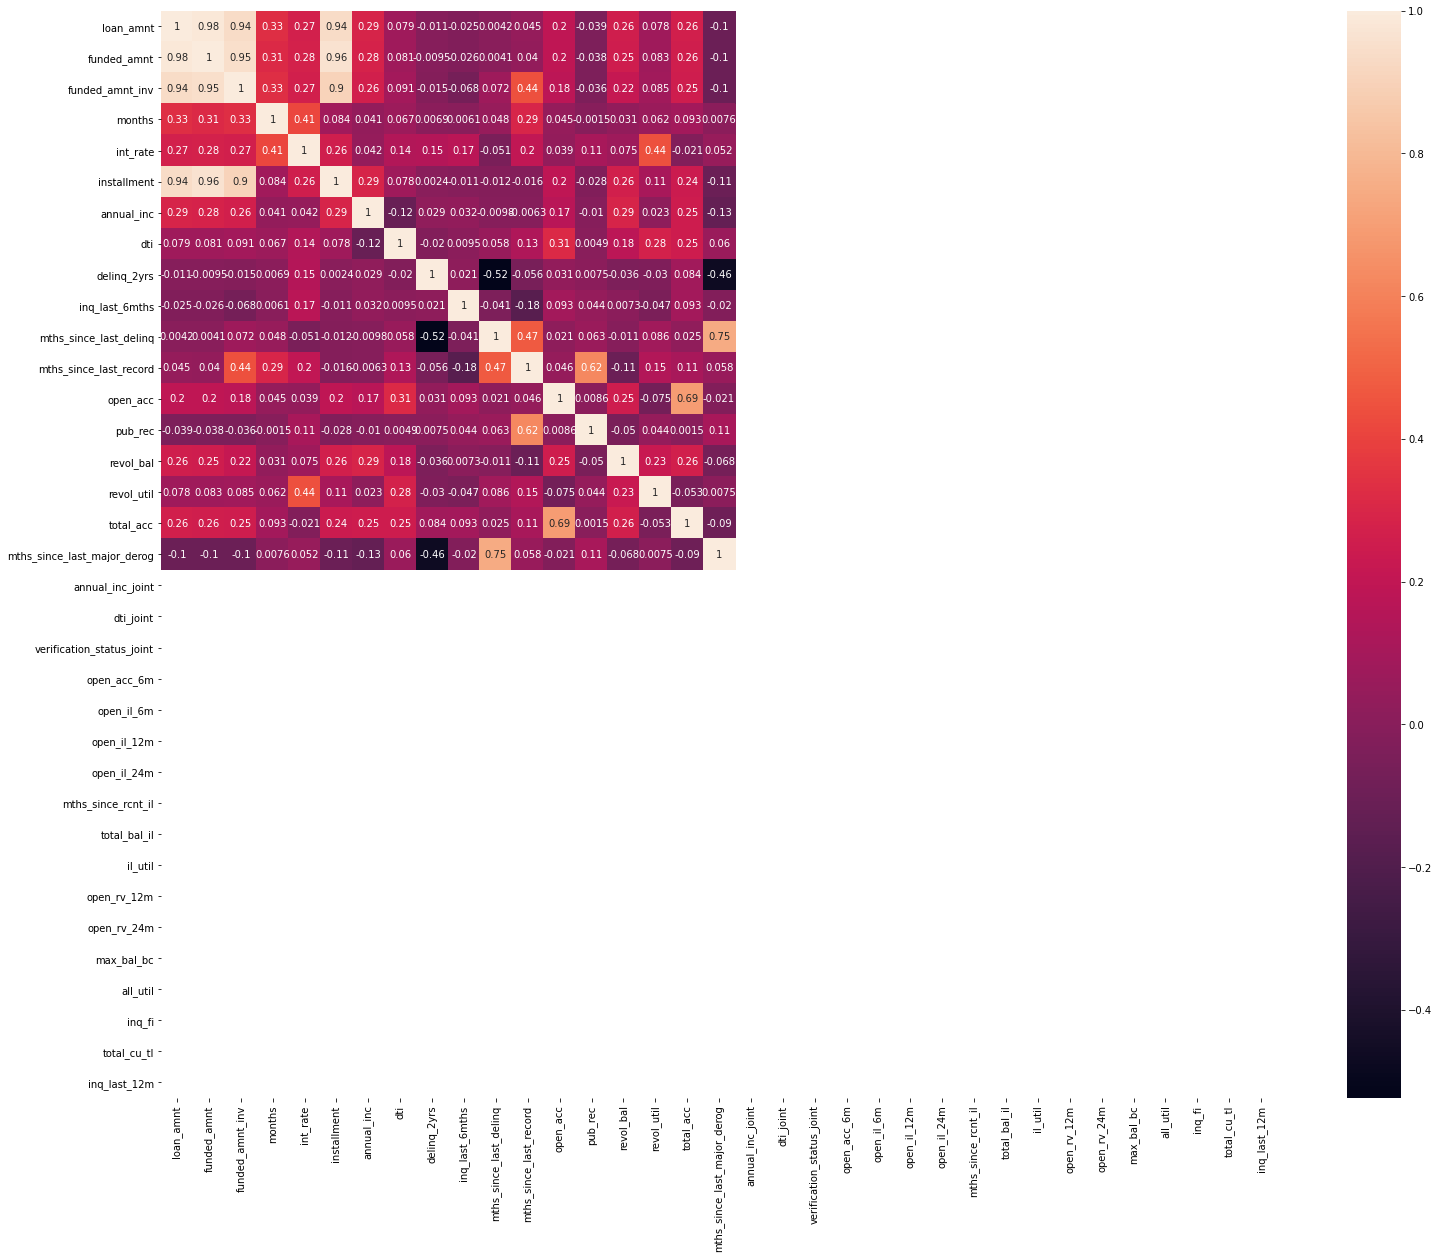

In [12]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True)

In [13]:
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]
#So many correlated variables, however this problem will be 
#adressed to some extent as we progress with data cleaning and preparation

funded_amnt                  loan_amnt                 0.984558
funded_amnt_inv              loan_amnt                 0.936360
                             funded_amnt               0.952318
installment                  loan_amnt                 0.938698
                             funded_amnt               0.961058
                             funded_amnt_inv           0.904523
pub_rec                      mths_since_last_record    0.621407
total_acc                    open_acc                  0.693745
mths_since_last_major_derog  mths_since_last_delinq    0.745857
dtype: float64

In [14]:
print(df.shape)
print(df.columns)

(45290, 50)
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'months', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mths_since_last_major_derog', 'application_type', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')


In [15]:
#finalising target variable to evaluate other variables
df['loan_status'].unique()
#lets study loan_status category and define our target variable

array(['Fully Paid', 'Charged Off', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [0]:
#Lets arrange them based on the risk associated with each category

#'Fully Paid'- Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment
#'Does not meet the credit policy. Status:Fully Paid'- Such loans are fully paid with some credit policy violation such as EMI bounce due to insufficient balance, Late payment, etc.  

#'In Grace Period'- Loan is past due but within the 15-day grace period
#'Late (16-30)'- Loan has not been current for 16 to 30 days
#'Late (31-120)'- Loan has not been current for 31 to 120 days

#'Default'- Loan has not been current for 121 days or more
#'Does not meet the credit policy. Status:Fully Paid'
#'Charged Off'- Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance


In [0]:
df['loan_status'] = df['loan_status'].replace({'Fully Paid': 'Good Loans' ,'Does not meet the credit policy. Status:Fully Paid': 'Good Loans'})
#df['loan_status'] = df['loan_status'].replace({'In Grace Period': 'Risky Loans', 'Late (16-30 days)': 'Risky Loans', 'Late (31-120 days)': 'Risky Loans'})
df['loan_status'] = df['loan_status'].replace({'Charged Off': 'Bad Loans' ,'Does not meet the credit policy. Status:Charged Off': 'Bad Loans',
                                              'Default': 'Bad Loans'})

In [17]:
df['loan_status'].unique()

array(['Good Loans', 'Bad Loans'], dtype=object)

In [18]:
df['loan_status'].value_counts()

Good Loans    37994
Bad Loans      7296
Name: loan_status, dtype: int64

In [0]:
#lets understand variable one by one, but before that some preparation needs to be done
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year

def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [20]:
#months
print("\n*******Check for Unique Values************")
print(df['months'].unique())
print("\n*******Check for Count of Values************")
print(df.months.value_counts())
print("\n*******Check for Missing Values************")
print(df['months'].isnull().sum()*100/len(df))
print("\n*******Check Value Distribution By Bad Loans************")
print(df.groupby('months')['loan_status'].value_counts(normalize=True).loc[:,'Bad Loans'])
print("\n*******Check Value Distribution By Good Loans************")
print(df.groupby('months')['loan_status'].value_counts(normalize=True).loc[:,'Good Loans'])
#It is evident that laon with 5 years loan period has 65% default rate this implies that higher the laon period,
#higher will be the chance of default  


*******Check for Unique Values************
[36 60]

*******Check for Count of Values************
36    35214
60    10076
Name: months, dtype: int64

*******Check for Missing Values************
0.0

*******Check Value Distribution By Bad Loans************
months
36    0.127307
60    0.279178
Name: loan_status, dtype: float64

*******Check Value Distribution By Good Loans************
months
36    0.872693
60    0.720822
Name: loan_status, dtype: float64


In [21]:
#loan amount
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Bad Loans,7296.0,12258.388158,8133.551811,500.0,6000.00,10000.0,17000.0,35000.0
Good Loans,37994.0,11023.379349,7284.763766,500.0,5406.25,9800.0,15000.0,35000.0


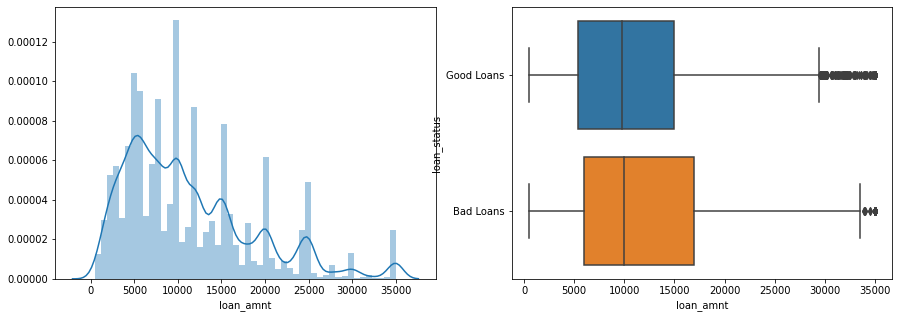

In [22]:
plot_distribution(df, 'loan_amnt')
#Overall, loan amount distribution is slightly left-skewed. Most of the loans granted are below 20000 (75 percentile value)
#Funding amounts see a spike around each 1000 boundary.

In [23]:
df.groupby('issue_d_year')['loan_amnt'].count()

issue_d_year
2007      603
2008     2393
2009     5281
2010    12523
2011    19683
2013     4807
Name: loan_amnt, dtype: int64

In [24]:
df.groupby('int_rate')['loan_amnt'].count()

int_rate
5.42     573
5.79     410
5.99     347
6.00      19
6.03     502
        ... 
25.80     13
25.83      6
25.89     10
25.99      3
26.06      2
Name: loan_amnt, Length: 425, dtype: int64

In [0]:
#deriving new variable
df['loan_to_inc'] = df['loan_amnt'] / (df['annual_inc'] + 1)

In [26]:
df[['loan_to_inc', 'loan_amnt', 'annual_inc']].head(5)

,loan_to_inc,loan_amnt,annual_inc
0,0.208325,5000,24000.0
1,0.083331,2500,30000.0
2,0.195870,2400,12252.0
3,0.203248,10000,49200.0
5,0.138885,5000,36000.0


In [27]:
df.groupby('loan_status')['loan_to_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Bad Loans,7296.0,0.217224,0.127714,0.004611,0.116390,0.197708,0.299993,1.119776
Good Loans,37990.0,0.179705,0.109835,0.000789,0.096152,0.159231,0.241932,1.337166


In [28]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Bad Loans,7296.0,12258.388158,8133.551811,500.0,6000.00,10000.0,17000.0,35000.0
Good Loans,37994.0,11023.379349,7284.763766,500.0,5406.25,9800.0,15000.0,35000.0


In [29]:
df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Bad Loans,7296.0,63878.707279,47449.259195,2000.0,38000.0,54000.0,75000.0,840000.0
Good Loans,37990.0,70785.525825,65467.637270,1896.0,42000.0,60000.0,85000.0,6000000.0


In [30]:
#int rate
df.groupby('loan_status')['int_rate'].describe()
#max value is 28.99 which is quite, there is a high possibility of outlier but this will be not be our concern as we will be using 
#RF classifier which handles such issues very efficiently
#The intrest rate for bad loans loans appear to be higher than for good ones which is quite natural

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Bad Loans,7296.0,14.260857,3.769816,5.42,11.71,14.11,16.77,25.99
Good Loans,37994.0,11.916303,3.729209,5.42,8.90,11.83,14.38,26.06


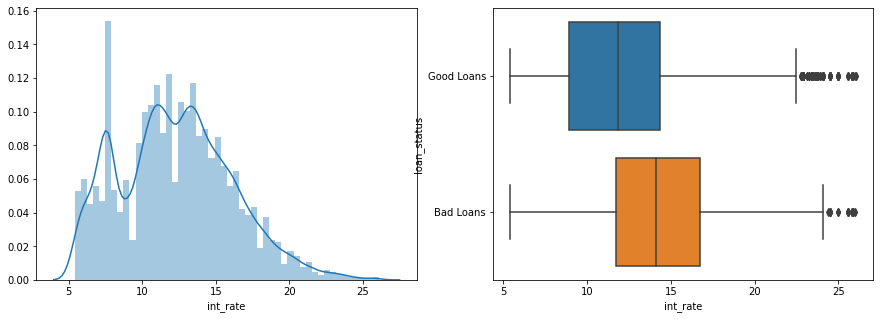

In [31]:
plot_distribution(df, 'int_rate')

In [0]:
#df['int_rate_bin'] = pd.cut(df['int_rate'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

In [0]:
#since loan amount and installment was highly correlated in the correlation matrix we can instead derive a new varibale and drop
#installment
df['installment_ratio'] = df['installment'] / df['loan_amnt']

In [0]:
df = df.drop(labels='installment', axis=1)

In [35]:
#grade and sub grades

print("\n*******Check for Unique Values************")
print(df['grade'].unique())
print("\n*******Check for Count of Values************")
print(df.grade.value_counts())
print("\n*******Check for Missing Values************")
print(df['grade'].isnull().sum()*100/len(df))


*******Check for Unique Values************
['B' 'C' 'A' 'E' 'F' 'D' 'G']

*******Check for Count of Values************
B    13195
A    10809
C     9579
D     6471
E     3437
F     1286
G      513
Name: grade, dtype: int64

*******Check for Missing Values************
0.0


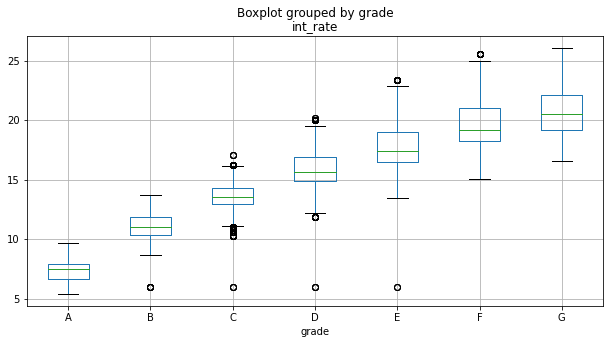

In [36]:
df.boxplot(column=['int_rate'],by='grade', figsize=(10,5))

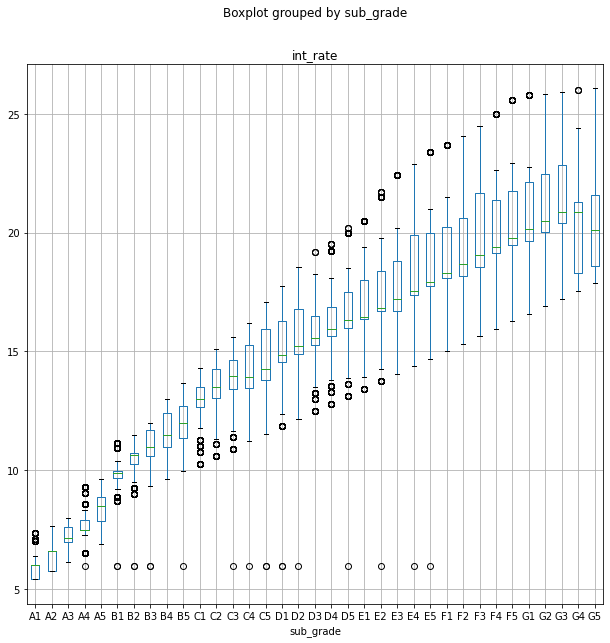

In [37]:
df.boxplot(column=['int_rate'],by='sub_grade', figsize=(10,10))
#Lending club grading system is functioning well and investor can rely on it before making any investment
#lower grade attracts high interest rate and subsequently high chance of default

In [0]:
#employee title

df.emp_title.describe()
#contain too many categories, this feature can only be analysed using NLP, hence for now deleting it should be right
df=df.drop(["emp_title"], axis=1)

In [39]:
#empl_length

print("\n*******Check for Unique Values************")
print(df['emp_length'].unique())
print("\n*******Check for Count of Values************")
print(df.emp_length.value_counts())
print("\n*******Check for Missing Values************")
print(df['emp_length'].isnull().sum()*100/len(df))


*******Check for Unique Values************
['10+ years' '< 1 year' '3 years' '9 years' '4 years' '5 years' '1 year'
 '6 years' '2 years' '7 years' '8 years' nan]

*******Check for Count of Values************
10+ years    10382
< 1 year      5294
2 years       4963
3 years       4606
1 year        3745
4 years       3724
5 years       3608
6 years       2489
7 years       2055
8 years       1731
9 years       1461
Name: emp_length, dtype: int64

*******Check for Missing Values************
2.7202472952086554


In [40]:
#this feature need some engineering
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)
df['emp_length'].head()

0    10.0
1     1.0
2    10.0
3    10.0
5     3.0
Name: emp_length, dtype: float64

In [0]:
emp_length_mode = df['emp_length'].mode()[0]
df['emp_length'] = df['emp_length'].fillna(value=emp_length_mode)

In [42]:
#home_ownership

print("\n*******Check for Unique Values************")
print(df['home_ownership'].unique())
print("\n*******Check for Count of Values************")
print(df.home_ownership.value_counts())
print("\n*******Check for Missing Values************")
print(df['home_ownership'].isnull().sum()*100/len(df))
print("\n*******Check Value Distribution By Bad Loans************")
print(df.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Bad Loans'])
print("\n*******Check Value Distribution By Good Loans************")
print(df.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Good Loans'])


*******Check for Unique Values************
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']

*******Check for Count of Values************
RENT        21230
MORTGAGE    20396
OWN          3520
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

*******Check for Missing Values************
0.0

*******Check Value Distribution By Bad Loans************
home_ownership
MORTGAGE    0.151451
NONE        0.125000
OTHER       0.213235
OWN         0.166477
RENT        0.169147
Name: loan_status, dtype: float64

*******Check Value Distribution By Good Loans************
home_ownership
MORTGAGE    0.848549
NONE        0.875000
OTHER       0.786765
OWN         0.833523
RENT        0.830853
Name: loan_status, dtype: float64


In [0]:
#mortgage and rent category has highest loan count and also the high rate of bad loans
#Other, None, and Any has very less records, lets make it one category 
df.loc[df['home_ownership'].isin(['ANY', 'NONE']), 'home_ownership'] = 'OTHER'

In [44]:
df['home_ownership'].value_counts()

RENT        21230
MORTGAGE    20396
OWN          3520
OTHER         144
Name: home_ownership, dtype: int64

In [45]:
#annual_inc
print("\n*******Check for Missing Values************")
print(df['annual_inc'].isnull().sum()*100/len(df))


*******Check for Missing Values************
0.00883197173769044


In [46]:
df.annual_inc.describe()

count    4.528600e+04
mean     6.967277e+04
std      6.296517e+04
min      1.896000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

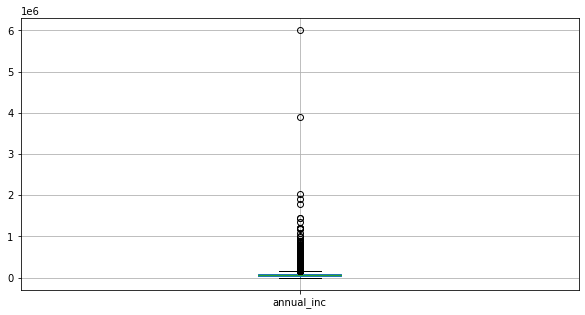

In [47]:
#plt.figure(figsize=(15, 3))
#sns.boxplot(x=df['annual_inc'], data=df)
df.boxplot(column=['annual_inc'], figsize=(10,5))

In [48]:
#df= df[np.abs(df.annual_inc-df.annual_inc.mean()) <= (3*df.annual_inc.std())]
df.annual_inc.isnull().sum()

4

In [49]:
pd.crosstab(df['annual_inc'].isnull(),df['emp_length'])

emp_length,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
annual_inc,,,,,,,,,,
False,9035,4963,4606,3724,3608,2489,2055,1731,1461,11614
True,4,0,0,0,0,0,0,0,0,0


In [50]:
df.groupby(df['emp_length'])['annual_inc'].mean()

emp_length
1.0     61940.953897
2.0     64063.323903
3.0     67601.642848
4.0     67365.599224
5.0     69178.175327
6.0     69185.361619
7.0     70378.474579
8.0     74768.729780
9.0     75992.798946
10.0    78224.606812
Name: annual_inc, dtype: float64

In [0]:
df['annual_inc'][(df['annual_inc'].isnull())]=67501.734199

In [0]:
#df=df[np.abs(df.annual_inc-df.annual_inc.mean()) <= (3*df.annual_inc.std())]

In [0]:
#plot_distribution(df, 'annual_inc')

In [0]:
#plt.figure(figsize=(15, 5))
#sns.distplot(df['annual_inc'], hist_kws={'log':False})
#plt.xticks(np.arange(0, 260000, 20000))
#plt.show()

In [55]:
#verification_status

print("\n*******Check for Unique Values************")
print(df['verification_status'].unique())
print("\n*******Check for Count of Values************")
print(df.verification_status.value_counts())
print("\n*******Check for Missing Values************")
print(df['verification_status'].isnull().sum()*100/len(df))
print("\n*******Check Value Distribution By Bad Loans************")
print(df.groupby('verification_status')['loan_status'].value_counts(normalize=True).loc[:,'Bad Loans'])
print("\n*******Check Value Distribution By Good Loans************")
print(df.groupby('verification_status')['loan_status'].value_counts(normalize=True).loc[:,'Good Loans'])


*******Check for Unique Values************
['Verified' 'Source Verified' 'Not Verified']

*******Check for Count of Values************
Not Verified       19581
Verified           14507
Source Verified    11202
Name: verification_status, dtype: int64

*******Check for Missing Values************
0.0

*******Check Value Distribution By Bad Loans************
verification_status
Not Verified       0.145396
Source Verified    0.161935
Verified           0.181636
Name: loan_status, dtype: float64

*******Check Value Distribution By Good Loans************
verification_status
Not Verified       0.854604
Source Verified    0.838065
Verified           0.818364
Name: loan_status, dtype: float64


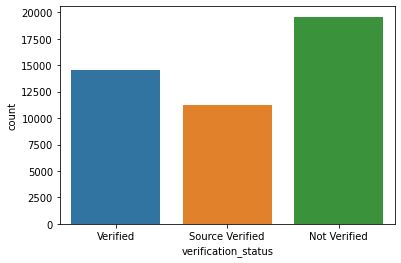

In [56]:
sns.countplot(x='verification_status',data=df)
#strange thing to notice here is that 'Not Verified' loans are large in numbers however, it has least number of 
#bad laons as compared to source verified and verified. This needs further analysis 

In [57]:
pd.crosstab(df['loan_status'],df['verification_status'])
#this is quite strange that Not Verified category have highest number of good loans as compared to verified sources. 

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Bad Loans,2847,1814,2635
Good Loans,16734,9388,11872


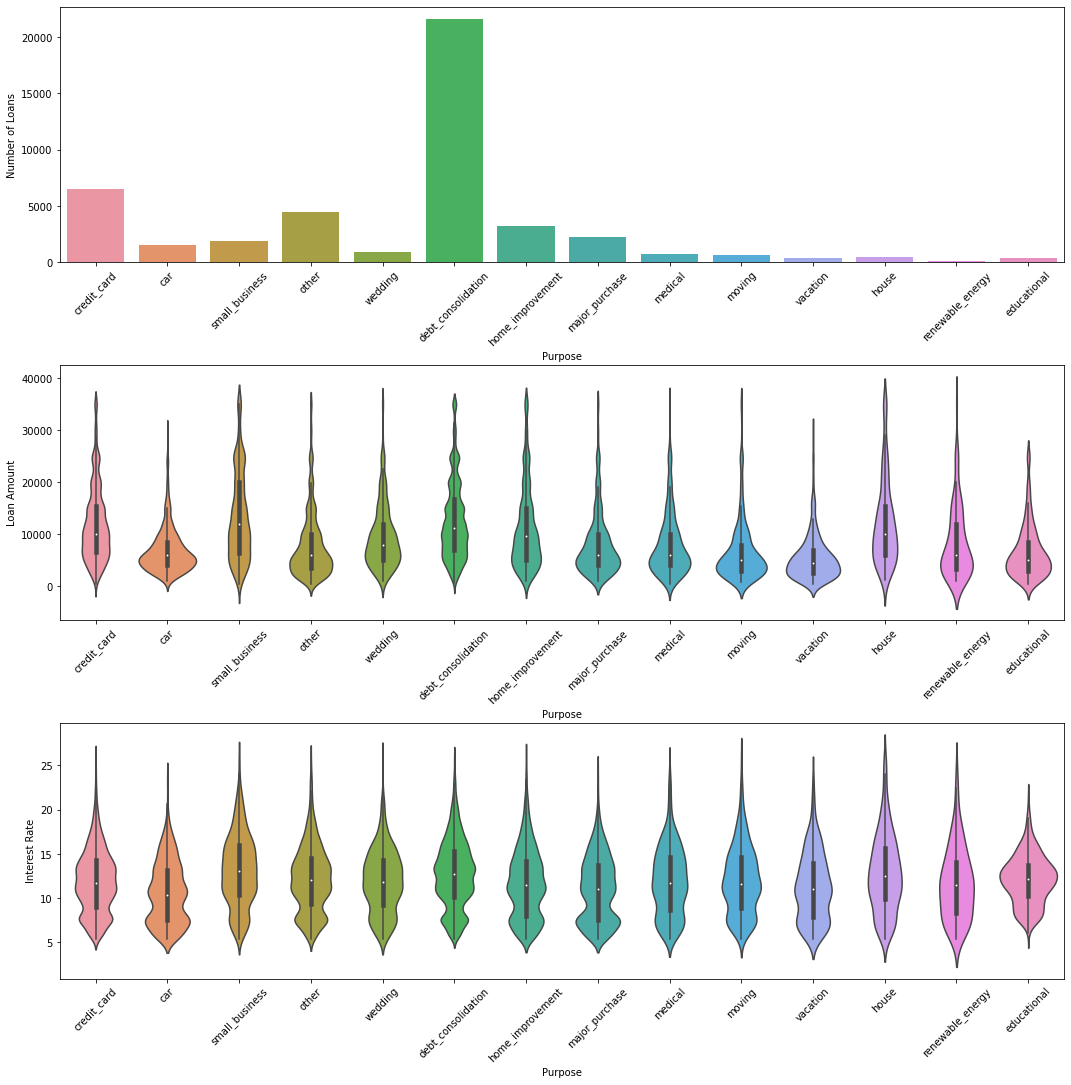

In [58]:
#purpose
#sns.barplot(x='sex',y='total_bill',data=t)
#sns.barplot(x='verification_status', y='loan_status', data=df)
#df.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Bad Loans'].sort_values()

fig, ax=plt.subplots(3,1,figsize=(18,20))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

#Already collected this in the above section
#tmpLoanDF = loanDF.select("purpose", "int_rate", "loan_amnt",).toPandas()

s0 = sns.countplot(x="purpose",data=df,ax=ax[0])
s0.set(xlabel='Purpose',ylabel='Number of Loans')
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)

s1 = sns.violinplot(x="purpose",y="loan_amnt",data=df, ax=ax[1], split=True)
s1.set(xlabel='Purpose',ylabel='Loan Amount')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

s2 = sns.violinplot(x="purpose",y="int_rate",data=df, ax=ax[2], split=True)
s2.set(xlabel='Purpose',ylabel='Interest Rate')
s2.set_xticklabels(s2.get_xticklabels(),rotation=45)


plt.show()

In [0]:
#Debt Consolidation has the highest number of loan counts
#Distribution of categorical varibale with respect to continous variable such as loan amount and interest rate looks skewed
#However this will not require any log transformation  as we are going to use RF classifier  

In [60]:
#title

df['title']

0                                     Computer
1                                         bike
2                         real estate business
3                                     personel
5        My wedding loan I promise to pay back
                         ...                  
53332                       Debt Consolidation
53335                Credit Card Consolidation
53336                       Debt consolidation
53337                       Debt consolidation
53338                              Consolidate
Name: title, Length: 45290, dtype: object

In [0]:
#this is a free text from the open end field of the application, needs to be deleted for now
df=df.drop(["title"], axis=1)

In [62]:
#addr_state and zip_code feature have high cardinality which needs to be treated as location could be the important factor for classifying loans

df['zip_code'].describe()

count     45290
unique      847
top       100xx
freq        661
Name: zip_code, dtype: object

In [63]:
#there are 925 unique codes lets remove it and focus on addr state as it will be easy to treat and can be included in our model

df['addr_state'].describe()

count     45290
unique       50
top          CA
freq       7901
Name: addr_state, dtype: object

In [64]:
df.groupby('addr_state')['loan_status'].value_counts(normalize=True)[:,'Bad Loans'].sort_values(ascending=False)

addr_state
NE    0.545455
IN    0.258621
NV    0.240069
MS    0.230769
SD    0.214286
TN    0.211009
FL    0.200185
MO    0.194411
AK    0.189474
MT    0.179245
GA    0.176176
HI    0.174757
CA    0.173396
OR    0.172211
KY    0.171582
MD    0.169620
MI    0.167235
IA    0.166667
WI    0.164835
NJ    0.164734
NC    0.164627
NM    0.164384
WA    0.163202
SC    0.160232
UT    0.159021
MN    0.158774
AZ    0.158475
AL    0.157791
LA    0.155378
VT    0.153846
OK    0.152047
NH    0.151961
AR    0.148410
NY    0.147853
PA    0.147214
IL    0.144661
OH    0.143582
VA    0.141956
CT    0.141304
TX    0.137713
CO    0.136170
RI    0.134884
KS    0.134796
MA    0.132646
WV    0.128079
DE    0.113475
ID    0.111111
DC    0.080851
WY    0.041667
Name: loan_status, dtype: float64

In [0]:
df['addr_state']=df['addr_state'].astype(str)

In [66]:
#since addr_state has high cardinality we should not create dummy for it let label endcode it
lb=LabelEncoder()
df['states_code']=lb.fit_transform(df['addr_state'])
df[['states_code','addr_state']].head(10)

,states_code,addr_state
0,3,AZ
1,10,GA
2,14,IL
3,4,CA
5,3,AZ
7,4,CA
8,4,CA
9,42,TX
10,3,AZ
11,4,CA


In [67]:
#dti

df.dti.describe()

count    45290.000000
mean        13.700439
std          6.905592
min          0.000000
25%          8.430000
50%         13.730000
75%         19.010000
max         34.950000
Name: dti, dtype: float64

In [68]:
print("\n*******Check for Missing Values************")
print(df['dti'].isnull().sum()*100/len(df))


*******Check for Missing Values************
0.0


<Figure size 720x360 with 0 Axes>

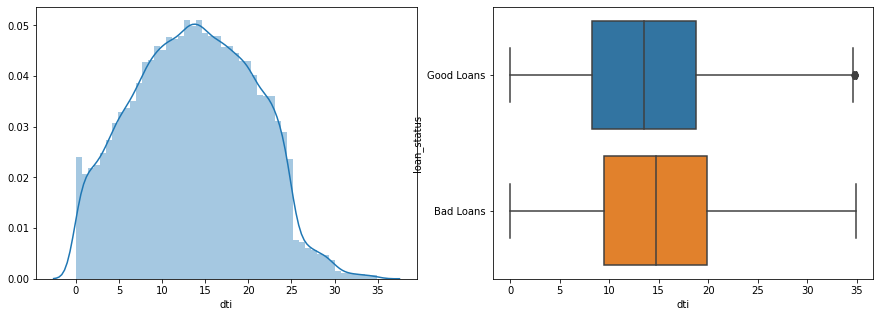

In [69]:
plt.figure(figsize=(10,5))
plot_distribution(df, 'dti')

In [0]:
#deriving the new feature
#df['dti_bin'] = pd.cut(df['dti'], [0,10,20,30,40,50,60], labels=['0-10','10-20','20-30','30-40','40-50','50-60'])

In [71]:
df.groupby('loan_status')['dti'].median()
#It's clear that borrowers who have higher DTI are more likely to be charged of

loan_status
Bad Loans     14.74
Good Loans    13.52
Name: dti, dtype: float64

In [72]:
#delinq_2yrs

print("\n*******Check for Unique Values************")
print(df['delinq_2yrs'].unique())
print("\n*******Check for Count of Values************")
print(df.delinq_2yrs.value_counts())
print("\n*******Check for Missing Values************")
print(df['delinq_2yrs'].isnull().sum()*100/len(df))
print("\n*******Check Value Distribution By Bad Loans************")
print(df.groupby('delinq_2yrs')['loan_status'].value_counts(normalize=True).loc[:,'Bad Loans'])
print("\n*******Check Value Distribution By Good Loans************")
print(df.groupby('delinq_2yrs')['loan_status'].value_counts(normalize=True).loc[:,'Good Loans'])


*******Check for Unique Values************
[ 0.  2.  3.  1.  4.  6.  5.  8.  7.  9. 11. nan 13. 15.]

*******Check for Count of Values************
0.0     39808
1.0      4060
2.0       915
3.0       301
4.0        98
5.0        35
6.0        18
7.0        10
8.0         7
9.0         4
11.0        3
15.0        1
13.0        1
Name: delinq_2yrs, dtype: int64

*******Check for Missing Values************
0.06403179509825568

*******Check Value Distribution By Bad Loans************
delinq_2yrs
0.0     0.158335
1.0     0.174877
2.0     0.208743
3.0     0.186047
4.0     0.224490
5.0     0.085714
6.0     0.222222
7.0     0.100000
8.0     0.285714
15.0    1.000000
Name: loan_status, dtype: float64

*******Check Value Distribution By Good Loans************
delinq_2yrs
0.0     0.841665
1.0     0.825123
2.0     0.791257
3.0     0.813953
4.0     0.775510
5.0     0.914286
6.0     0.777778
7.0     0.900000
8.0     0.714286
9.0     1.000000
11.0    1.000000
13.0    1.000000
Name: loan_status, dtype

In [0]:
# if we will see value distribution by bad loans, we will find that count of default increased significantly after 11 incidences
#lets treat missing value and move ahead 

delinq_mode = df['delinq_2yrs'].mode()[0]
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(value=delinq_mode)

In [74]:
#earliest_cr_line
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line']

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
5       2004-11-01
           ...    
53332   2000-02-01
53335   1999-07-01
53336   2002-08-01
53337   1999-07-01
53338   1995-10-01
Name: earliest_cr_line, Length: 45290, dtype: datetime64[ns]

In [0]:
df['earliest_year'] = df['earliest_cr_line'].dt.year

In [0]:
#derived variable

df['credit_length'] = df['issue_d_year'] - df['earliest_year']
df=df.drop(['earliest_cr_line', 'earliest_year'], axis=1)

In [77]:
#inq_last_6mths

print("\n*******Check for Unique Values************")
print(df['inq_last_6mths'].unique())
print("\n*******Check for Count of Values************")
print(df.inq_last_6mths.value_counts())
print("\n*******Check for Missing Values************")
print(df['inq_last_6mths'].isnull().sum()*100/len(df))
print("\n*******Check Value Distribution By Bad Loans************")
print(df.groupby('inq_last_6mths')['loan_status'].value_counts(normalize=True).loc[:,'Bad Loans'])
print("\n*******Check Value Distribution By Good Loans************")
print(df.groupby('inq_last_6mths')['loan_status'].value_counts(normalize=True).loc[:,'Good Loans'])


*******Check for Unique Values************
[ 1.  5.  2.  3.  0.  4.  6.  7.  8.  9. 10. 11. 12. 15. 14. 33. 17. 32.
 24. 13. 18. 16. 31. 28. 25. 27. 20. 19. nan]

*******Check for Count of Values************
0.0     20770
1.0     12200
2.0      6393
3.0      3366
4.0      1121
5.0       630
6.0       343
7.0       181
8.0       112
9.0        50
10.0       24
12.0       15
11.0       15
15.0        9
14.0        6
13.0        6
18.0        4
16.0        3
24.0        2
17.0        2
19.0        2
28.0        1
33.0        1
27.0        1
31.0        1
25.0        1
32.0        1
20.0        1
Name: inq_last_6mths, dtype: int64

*******Check for Missing Values************
0.06403179509825568

*******Check Value Distribution By Bad Loans************
inq_last_6mths
0.0     0.131536
1.0     0.166639
2.0     0.175661
3.0     0.214498
4.0     0.220339
5.0     0.268254
6.0     0.311953
7.0     0.364641
8.0     0.401786
9.0     0.360000
10.0    0.125000
11.0    0.200000
12.0    0.400000
13.0 

In [0]:
#not able to gauge its importance in classifying loans, lets see this variable later in feature selection and feature importance steps
mode = df['inq_last_6mths'].mode()[0]
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(value=mode)

In [79]:
#open_acc and total_acc
df['total_acc'].isnull().sum()

29

In [80]:
df.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Bad Loans,7293.0,9.492527,4.723583,1.0,6.0,9.0,12.0,47.0
Good Loans,37968.0,9.534845,4.534936,1.0,6.0,9.0,12.0,46.0


In [81]:
df['total_acc']

0         9.0
1         4.0
2        10.0
3        37.0
5        12.0
         ... 
53332    24.0
53335    26.0
53336    37.0
53337    28.0
53338    22.0
Name: total_acc, Length: 45290, dtype: float64

In [0]:
#first lets treat the missing values

df.total_acc = df.total_acc.fillna(df.total_acc.median())

In [83]:
# max value is 150, this shows that data has outliers
df.total_acc.describe()

count    45290.000000
mean        22.524310
std         11.689754
min          1.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

<Figure size 1080x360 with 0 Axes>

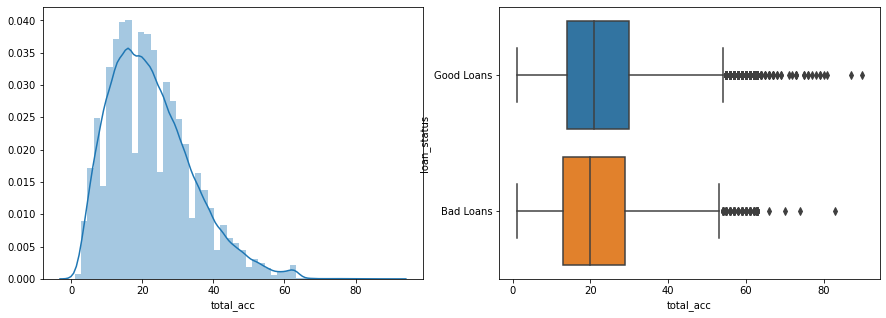

In [84]:
plt.figure(figsize=(15,5))

plot_distribution(df, 'total_acc')
#There is no significant difference in the credit lines of good and bad loans.

In [0]:
#open_acc
# open_acc is highly correlated (0.7) with total_acc, hence we can either delete on of those or we can derive a variable
#lets first check the missing value in the column

df['open_acc'].isnull().sum()
df.open_acc = df.open_acc.fillna(df.open_acc.median())

In [0]:
#lets make a derived varibale active account, which will make more sense
#df['active_acc']=df['total_acc']-df['open_acc']

In [87]:
#pub_rec

print("\n*******Check for Unique Values************")
print(df['pub_rec'].unique())
print("\n*******Check for Count of Values************")
print(df.pub_rec.value_counts())
print("\n*******Check for Missing Values************")
print(df['pub_rec'].isnull().sum()*100/len(df))
print("\n*******Check Value Distribution By Bad Loans************")
print(df.groupby('pub_rec')['loan_status'].value_counts(normalize=True).loc[:,'Bad Loans'])
print("\n*******Check Value Distribution By Good Loans************")
print(df.groupby('pub_rec')['loan_status'].value_counts(normalize=True).loc[:,'Good Loans'])


*******Check for Unique Values************
[ 0.  1.  2.  3.  4.  5. nan  6.  9.  8.  7.]

*******Check for Count of Values************
0.0    42289
1.0     2799
2.0      121
3.0       33
4.0       11
5.0        3
6.0        2
7.0        1
9.0        1
8.0        1
Name: pub_rec, dtype: int64

*******Check for Missing Values************
0.06403179509825568

*******Check Value Distribution By Bad Loans************
pub_rec
0.0    0.156495
1.0    0.230082
2.0    0.206612
3.0    0.090909
4.0    0.181818
7.0    1.000000
Name: loan_status, dtype: float64

*******Check Value Distribution By Good Loans************
pub_rec
0.0    0.843505
1.0    0.769918
2.0    0.793388
3.0    0.909091
4.0    0.818182
5.0    1.000000
6.0    1.000000
8.0    1.000000
9.0    1.000000
Name: loan_status, dtype: float64


In [0]:
#derogatory records are never good, above summary shows that even with zero derogator records ~22% are defaulting
#and this percentage increases with the number of derogatory records
# lets fill the missing value of this feature and move ahead

df.pub_rec = df.pub_rec.fillna(df.pub_rec.mode())

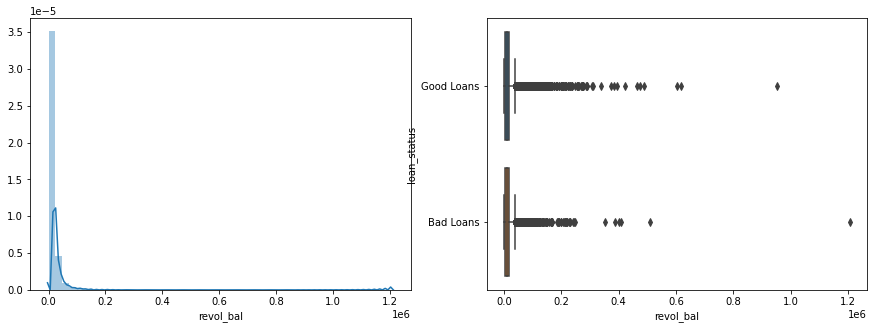

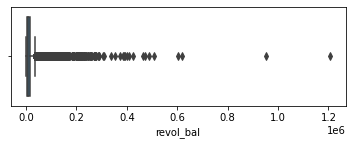

In [89]:
#revol_bal
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(df['revol_bal'])
plt.subplot(1, 2, 2)
sns.boxplot(x=df['revol_bal'], y=df['loan_status'], data=df)
#sns.barplot(x='loan_status', y='annual_inc_log',data= master_loan)
plt.show()
plt.subplot(2, 1, 1)
sns.boxplot(x=df['revol_bal'], data=df)
plt.show()

In [90]:
# this feature has very extreme values and also outliers
df.revol_bal.describe()

count    4.529000e+04
mean     1.439514e+04
std      2.202903e+04
min      0.000000e+00
25%      3.896250e+03
50%      9.038000e+03
75%      1.741400e+04
max      1.207359e+06
Name: revol_bal, dtype: float64

In [0]:
df['revol_bal_log'] = df['revol_bal'].apply(lambda x : np.log(x+1))

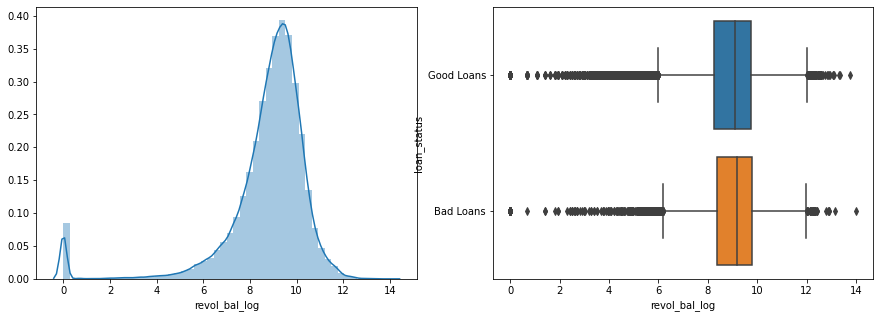

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(df['revol_bal_log'])
plt.subplot(1, 2, 2)
sns.boxplot(x=df['revol_bal_log'], y=df['loan_status'], data=df)

In [93]:
#this looks better now
df.revol_bal_log.describe()

count    45290.000000
mean         8.745227
std          1.877534
min          0.000000
25%          8.268026
50%          9.109304
75%          9.765087
max         14.003947
Name: revol_bal_log, dtype: float64

In [0]:
#revol_util
df['revol_util'].isnull().sum()
df.revol_util = df.revol_util.fillna(df.revol_util.mean())

In [95]:
df.revol_util.describe()

count    45290.000000
mean        49.804735
std         27.939084
min          0.000000
25%         27.200000
50%         50.500000
75%         72.800000
max        119.000000
Name: revol_util, dtype: float64

In [96]:
#application_type
df['application_type'].value_counts()

INDIVIDUAL    45290
Name: application_type, dtype: int64

In [0]:
#99.9% of the data have the same class hence we should remove it
df=df.drop(['application_type'], axis=1)

In [0]:
#addr_state

#df.groupby('addr_state')['loan_amnt'].count()

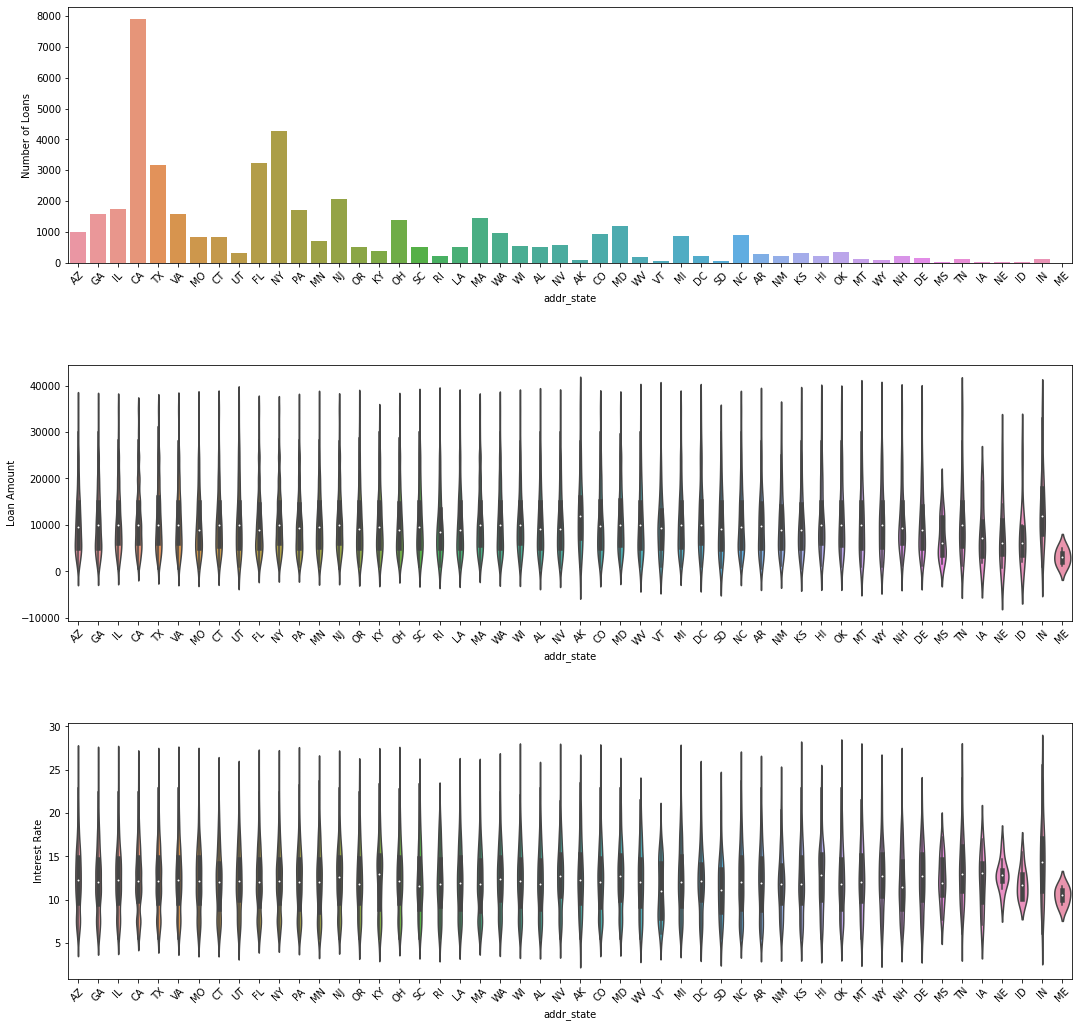

In [99]:
fig, ax=plt.subplots(3,1,figsize=(18,20))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

#Already collected this in the above section
#tmpLoanDF = loanDF.select("purpose", "int_rate", "loan_amnt",).toPandas()

s0 = sns.countplot(x="addr_state",data=df,ax=ax[0])
s0.set(xlabel='addr_state',ylabel='Number of Loans')
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)

s1 = sns.violinplot(x="addr_state",y="loan_amnt",data=df, ax=ax[1], split=True)
s1.set(xlabel='addr_state',ylabel='Loan Amount')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

s2 = sns.violinplot(x="addr_state",y="int_rate",data=df, ax=ax[2], split=True)
s2.set(xlabel='addr_state',ylabel='Interest Rate')
s2.set_xticklabels(s2.get_xticklabels(),rotation=45)


plt.show()

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45290 entries, 0 to 53338
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   loan_amnt                    45290 non-null  int64         
 1   funded_amnt                  45290 non-null  int64         
 2   funded_amnt_inv              45290 non-null  float64       
 3   months                       45290 non-null  int64         
 4   int_rate                     45290 non-null  float64       
 5   grade                        45290 non-null  object        
 6   sub_grade                    45290 non-null  object        
 7   emp_length                   45290 non-null  float64       
 8   home_ownership               45290 non-null  object        
 9   annual_inc                   45290 non-null  float64       
 10  verification_status          45290 non-null  object        
 11  issue_d                      45290 non-nu

In [0]:
#converting categorical data into dummies

df = pd.get_dummies(df,columns=["grade",'home_ownership',"verification_status",'purpose'],drop_first=True)
#'dti_bin', 'int_rate_bin'

In [0]:
#dropping few columns which are not required
df=df.drop(['sub_grade', 'issue_d', 'issue_d_month','issue_d_year', 'revol_bal', 'months'], axis=1)

In [103]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'emp_length',
       'annual_inc', 'loan_status', 'desc', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'loan_to_inc',
       'installment_ratio', 'states_code', 'credit_length', 'revol_bal_log',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_deb

In [104]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
miss_df1=missing_value_df.sort_values('percent_missing', ascending=False)
miss_df1.head(50)

,column_name,percent_missing
all_util,all_util,100.000000
annual_inc_joint,annual_inc_joint,100.000000
inq_last_12m,inq_last_12m,100.000000
total_cu_tl,total_cu_tl,100.000000
inq_fi,inq_fi,100.000000
max_bal_bc,max_bal_bc,100.000000
open_rv_24m,open_rv_24m,100.000000
open_rv_12m,open_rv_12m,100.000000
il_util,il_util,100.000000
total_bal_il,total_bal_il,100.000000


In [0]:
# dti_joint, verification_status_joint, and annual_inc_joint have same missing values and also these columns are related to 
#only 'joint' category of applicant type variable, count of which is only 6 out of 275128 records. Better to drop these

df=df.drop(['dti_joint','verification_status_joint','annual_inc_joint'], axis=1)

In [106]:
df.groupby('loan_status')['open_rv_24m'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Bad Loans,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Good Loans,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
temp_df3=df.loc[(df['open_rv_24m']==True)]
pd.set_option('max_columns', None)
temp_df3.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,loan_status,desc,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,mths_since_last_major_derog,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,loan_to_inc,installment_ratio,states_code,credit_length,revol_bal_log,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding


In [0]:
#After studying variables with high missing values i found that 'open_rv_24m', 'open_acc_6m', 'total_cu_tl', 'inq_fi','all_util','max_bal_bc', 
# 'open_rv_12m', 'total_bal_il','open_il_24m', 'open_il_12m', 'open_il_6m', and 'inq_last_12m' only distributed among the good loans
# category of loan status and the count of each of aforementioned varibale is 144 out of 275128 records. Hence these 
# variables cannot contibute much in classifying loans. lets drop these variables


df=df.drop(['open_rv_24m', 'open_acc_6m', 'total_cu_tl', 'inq_fi','all_util','max_bal_bc', 
    'open_rv_12m', 'total_bal_il','open_il_24m', 'open_il_12m', 'open_il_6m', 'inq_last_12m'], axis=1)

In [0]:
#dropping few more variable which are not relevant

df=df.drop(['il_util', 'mths_since_rcnt_il', 'mths_since_last_record', 'mths_since_last_major_derog','desc'], axis=1)

#il_util	il_util	99.927307
#mths_since_rcnt_il	mths_since_rcnt_il	99.919674
#mths_since_last_record	mths_since_last_record	86.950074
#mths_since_last_major_derog	mths_since_last_major_derog	80.537059
#desc	desc	66.545753

In [0]:
#df['pub_rec'].value_counts()
df.pub_rec = df.pub_rec.fillna(df.pub_rec.median())

In [0]:
df.credit_length = df.credit_length.fillna(df.credit_length.mean())
df.loan_to_inc = df.loan_to_inc.fillna(df.loan_to_inc.mean())

In [0]:
df['loan_status'] = df['loan_status'].replace({'Good Loans': '0' ,'Bad Loans': '1'})

In [113]:
pd.set_option('max_columns', None)
df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,loan_status,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,loan_to_inc,installment_ratio,states_code,credit_length,revol_bal_log,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000,5000,4975.0,10.65,10.0,24000.0,0,860xx,AZ,27.65,0.0,1.0,NaN,3.0,0.0,83.7,9.0,0.208325,0.032574,3,26.0,9.521422,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,15.27,1.0,30000.0,1,309xx,GA,1.00,0.0,5.0,NaN,3.0,0.0,9.4,4.0,0.083331,0.023932,10,12.0,7.431300,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,15.96,10.0,12252.0,0,606xx,IL,8.72,0.0,2.0,NaN,2.0,0.0,98.5,10.0,0.195870,0.035138,14,10.0,7.991931,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000,10000,10000.0,13.49,10.0,49200.0,0,917xx,CA,20.00,0.0,1.0,35.0,10.0,0.0,21.0,37.0,0.203248,0.033931,4,15.0,8.630343,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,5000,5000,5000.0,7.90,3.0,36000.0,0,852xx,AZ,11.20,0.0,3.0,NaN,9.0,0.0,28.3,12.0,0.138885,0.031292,3,7.0,8.982687,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [114]:
df['loan_status']=df['loan_status'].astype(int)
df['loan_status'].dtype

dtype('int64')

In [0]:
X=df.drop(['loan_status','addr_state', 'funded_amnt', 'funded_amnt_inv', 'mths_since_last_delinq', 'zip_code','inq_last_6mths'], axis=1)
y=df['loan_status'].astype(int)
features=X.columns

In [0]:
ss=StandardScaler()
X_new=ss.fit_transform(X)

In [117]:
df['loan_status'].value_counts()

0    37994
1     7296
Name: loan_status, dtype: int64

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(33967, 39) (33967,) (11323, 39) (11323,)


In [0]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

In [120]:
np.count_nonzero(y_train_new == 0)

28458

In [121]:
class_weight = int(y_train.value_counts()[0]/y_train.value_counts()[1])
class_weight

5

In [122]:
#Using preffered classifier as takes care of the data abnormalities and uses bagging ensemble technique which improvise 
#its performance and reduce variance, n_estimators=300,class_weight={0:1,1:class_weight}
rfc=RandomForestClassifier()
rfc.fit(X_train_new,y_train_new)
print(rfc.score(X_train_new,y_train_new))
print(rfc.score(X_test,y_test))

1.0
0.8361741587918397


In [123]:
pred1=rfc.predict(X_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

0.8361741587918397
[[9378  158]
 [1697   90]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      9536
           1       0.36      0.05      0.09      1787

    accuracy                           0.84     11323
   macro avg       0.60      0.52      0.50     11323
weighted avg       0.77      0.84      0.78     11323



In [124]:
print(f1_score(y_test,rfc.predict(X_test)))

0.08845208845208846


In [0]:
param_grid = { 
    'n_estimators': randint(100,500,20),
    'bootstrap': [True,False],
    'max_features': randint(2,8),
    'max_features': ['auto', 'sqrt'],
    'max_depth' : randint(4,10)
}

In [126]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold

n_estimators = np.arange(100, 1000, 100)
max_features = np.arange(1, 10, 1)
min_samples_leaf = np.arange(2, 10, 1)
kfold = KFold(n_splits = 3)
start_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    }

rf = RandomForestClassifier()

test_rf = RandomizedSearchCV(estimator=rf, param_distributions=start_grid, cv=kfold)
print(start_grid)

{'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]), 'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])}


In [127]:
test_rf.fit(X_train_new, y_train_new)
print(test_rf.score(X_train,y_train))
print(test_rf.score(X_test,y_test))
test_rf.best_params_

0.9743869049371449
0.8351143689834849


{'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 100}

In [0]:
#RS = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, n_jobs=-1, verbose=2)
#RS.fit(X_train_new, y_train_new)

In [0]:
#print(RS.score(X_train,y_train))
#print(RS.score(X_test,y_test))

In [0]:
#from imblearn.ensemble import BalancedRandomForestClassifier
#brf = BalancedRandomForestClassifier(n_estimators=500,random_state=0)
#brf.fit(X_train,y_train)
#print(brf.score(X_train,y_train))
#print(brf.score(X_test,y_test))

In [0]:
#pred=brf.predict(X_test)
#print(accuracy_score(y_test,pred))
#print(confusion_matrix(y_test,pred))
#print(classification_report(y_test,pred))

In [0]:
#print(f1_score(y_test,brf.predict(X_test)))
#from sklearn.metrics import f1_score
#print(f1_score(y_test,brf.predict(X_test)))
#print(X_test)

In [136]:
from sklearn.utils import resample
#Upsample minority class
df_majority = df[df.loan_status==0]
df_minority = df[df.loan_status==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=209711,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.loan_status.value_counts()

1    209711
0     37994
Name: loan_status, dtype: int64

In [134]:
#Downsample majority class
# Separate majority and minority classes
df_majority = df[df.loan_status==0]
df_minority = df[df.loan_status==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=47228,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.loan_status.value_counts()

ValueError: ignored

In [0]:
model = XGBClassifier(scale_pos_weight=class_weight,seed=42)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

In [0]:
pred2=model.predict(X_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

In [0]:
print(f1_score(y_test,model.predict(X_test)))
print(accuracy_score(y_test,model.predict(X_test)))

In [0]:
pd.Series(y_train_new).value_counts().plot.bar()

In [0]:
rfc.fit(X_train_new,y_train_new)
print(rfc.score(X_train_new,y_train_new))
print(rfc.score(X_test,y_test))

In [0]:
pred1=rfc.predict(X_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

In [0]:
print(f1_score(y_test,rfc.predict(X_test)))
print(accuracy_score(y_test,rfc.predict(X_test)))

In [0]:
# prediction for Training data
train_pred_sm = rfc.predict(X_train_new)

# prediction for Testing data
test_pred_sm = rfc.predict(X_test)

In [0]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

In [0]:
print(pd.crosstab(y_test, test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

In [0]:
#RS.best_params_

In [0]:
#from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC
#from sklearn.ensemble import VotingClassifier
#seed = 7
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
#estimators = []
#m1 = LogisticRegression()
#estimators.append(('logistic', m1))
#m2 = DecisionTreeClassifier()
#estimators.append(('cart', m2))
#m3 = SVC()
#estimators.append(('svm', m3))
# create the ensemble model
#ensemble = VotingClassifier(estimators)
#results = model_selection.cross_val_score(ensemble, X_train_new, y_train_new, cv=kfold)
#print(results.mean())

In [0]:
plt.figure(figsize=(15, 5))
feat_imp = pd.Series(rfc.feature_importances_, features).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
#we can use below important features to train our model and check if its effects the accuracy or not

In [0]:
#pred=RS.predict(X_test)
#print(accuracy_score(y_test,pred))
#print(confusion_matrix(y_test,pred))
#print(classification_report(y_test,pred))

In [0]:
#this accuracy will not help lets try using boosting technique to increase the accuracy. This is the squential learning model 
#based on correcting prediction of weak learners and make the strong classifier. 
#the base estimator is decision tree for these techniques hence these are also not prone to missing values and outliers
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=5)
ab=AdaBoostClassifier(base_estimator=dtc, algorithm='SAMME', n_estimators=300, learning_rate=1)
boost=ab.fit(X_train,y_train)
print(boost.score(X_train,y_train))
print(boost.score(X_test,y_test))

In [0]:
pred1=boost.predict(X_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

In [0]:
help(XGBClassifier())

In [0]:
#Below algorithm would need more data preparation hence currently not using it
#from sklearn.ensemble import VotingClassifier
#model1 = LogisticRegression(random_state=1)
#model2 = DecisionTreeClassifier(random_state=1)
#model3 = SVC(random_state=1)
#model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], voting='hard')
#model.fit(X_train,y_train)
#model.score(X_test,y_test)

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [0]:
pipeline_sgdlr = Pipeline([
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, warm_start=True))
])

In [0]:
param_grid_sgdlr  = {
    'model__alpha': [10**-5, 10**-1, 10**2],
    'model__penalty': ['l1', 'l2']
}

In [0]:
grid_sgdlr = GridSearchCV(estimator=pipeline_sgdlr, param_grid=param_grid_sgdlr, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=4, verbose=1, return_train_score=False)

In [0]:
grid_sgdlr.fit(X_train, y_train)

In [0]:
pred3=grid_sgdlr.predict(X_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
pipeline_knn = Pipeline([
    ('pca', decomposition.PCA()),
    ('model', KNeighborsClassifier(n_jobs=-1))   
])

pipeline_knn2 = Pipeline([
    ('lda', LinearDiscriminantAnalysis()),
    ('model', KNeighborsClassifier(n_jobs=-1))   
])

In [0]:
param_grid_knn = {
    'pca__n_components': [3,9],
    'model__n_neighbors': [5, 25, 125]
}
param_grid_knn2 = {
    'lda__n_components': [3,9],
    'model__n_neighbors': [5, 25, 125]
}

In [0]:
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=4, verbose=1, return_train_score=False)
grid_knn2 = GridSearchCV(estimator=pipeline_knn2, param_grid=param_grid_knn2, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=4, verbose=1, return_train_score=False)

In [0]:
grid_knn2.fit(X_train, y_train)

In [0]:
pred4=grid_knn2.predict(X_test)
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

In [0]:
X_train.info()